# Compare the CH4 absorption coefficient used in Satellite Bands against the HITRAN database

Using /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran

CH4
                     Lines parsed: 18875
CH4_sentinel2_11
                     Lines parsed: 5831
CH4_sentinel2_10
                     Lines parsed: 4954
CH4_sentinel2_12
                     Lines parsed: 24625

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CH4_sentinel2_10
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_10.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_10.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_10.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_10.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_10.data
  655

/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/code/hapi.py:35487: UserWarning: Big wavenumber step: possible accuracy decline
  warn('Big wavenumber step: possible accuracy decline')


0.438971 seconds elapsed for abscoef; nlines = 4954
318 0.0018640125300940194 0.0015751870356118928 0.0004324743762093


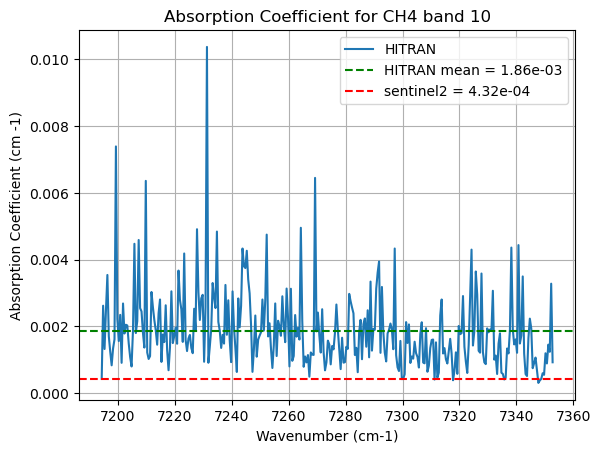

Using /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran

CH4
                     Lines parsed: 18875
CH4_sentinel2_11
                     Lines parsed: 5831
CH4_sentinel2_10
                     Lines parsed: 4954
CH4_sentinel2_12
                     Lines parsed: 24625

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CH4_sentinel2_11
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_11.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_11.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_11.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_11.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_11.data
  655

/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/code/hapi.py:35487: UserWarning: Big wavenumber step: possible accuracy decline
  warn('Big wavenumber step: possible accuracy decline')


0.490684 seconds elapsed for abscoef; nlines = 5831
695 0.0020536605006151046 4.3403356909671086e-05 0.0377415377849804


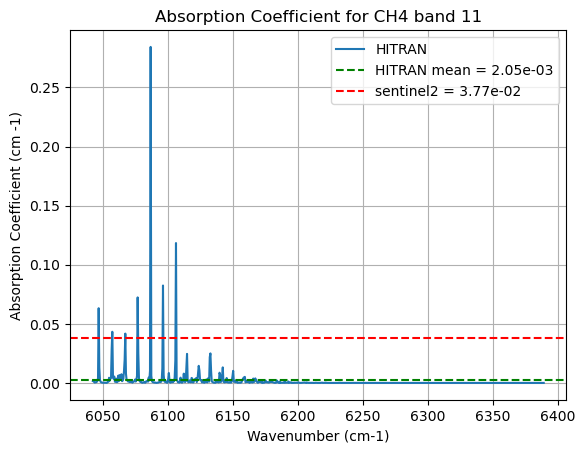

Using /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran

CH4
                     Lines parsed: 18875
CH4_sentinel2_11
                     Lines parsed: 5831
CH4_sentinel2_10
                     Lines parsed: 4954
CH4_sentinel2_12
                     Lines parsed: 24625

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CH4_sentinel2_12
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_12.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_12.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_12.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_12.data
  65536 bytes written to /Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/CH4_sentinel2_12.data
  655

/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/code/hapi.py:35487: UserWarning: Big wavenumber step: possible accuracy decline
  warn('Big wavenumber step: possible accuracy decline')


2.060403 seconds elapsed for abscoef; nlines = 24625
752 0.012607176435876942 0.0012586258030992219 0.2641716783600044


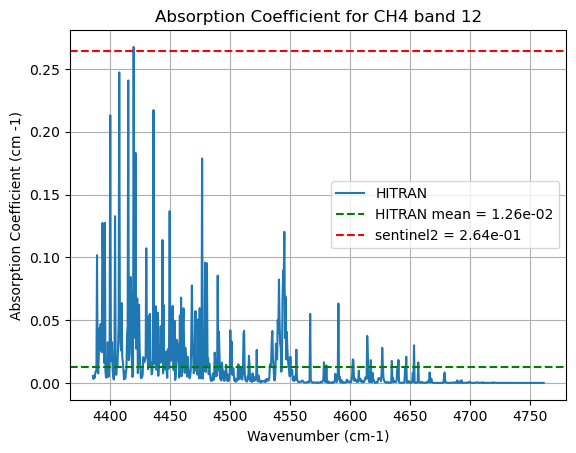

In [35]:
from hapi import *
import ssl
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ch4_optics_functions import *

# Set necessary for accessing HITRAN database 
os.environ['GLOBAL_HOST'] = 'http://hitran.org'
ssl._create_default_https_context = ssl._create_unverified_context

hitran_data_dir = "/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran"

# file with satellite bands
satellite = "sentinel2"

obs_file = f"../input_data/{satellite}_band_wavelength.csv"
bands = pd.read_csv(obs_file)

# Subset the data based on CH4_AC > 0
subset_bands = bands[bands["CH4_AC"] < 0]
subset_bands = subset_bands[["Band", "Wavelength_start", "Wavelength_end", "CH4_AC"]]

for index, row in subset_bands.iterrows():
    wavelength_start = row["Wavelength_start"]
    wavelength_end = row["Wavelength_end"]
    ch4_ac = row["CH4_AC"]
    band = row["Band"]

    # Compute wavelength range and wavenumber in cm^-1
    low_wavenumbers = 1.e7 / wavelength_end
    high_wavenumbers = 1.e7 / wavelength_start

    # Set the local folder to download the HITRAN data
    db_begin("/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran")
    abs_name = f"CH4_{satellite}_{band}"
    fetch(abs_name, 6,1,low_wavenumbers,high_wavenumbers)

    print(abs_name, low_wavenumbers,high_wavenumbers)

    # HITRAN_units : cm^2/molec (if True) and cm-1 (if False) and  WavenumberStep default value is 0.01 cm-1 but changed to 1 for now
    nu, abs_coef = absorptionCoefficient_Lorentz(SourceTables=abs_name,
                                                    Diluent={'air': 1.0},
                                                    HITRAN_units=False, Environment={'T': 296., 'p': 1.},
                                                    WavenumberStep=0.1)

    # Filter out zero values
    filtered_abs_coef = abs_coef[abs_coef > 0]

    # Compute effective absorption coefficient (This is smaller than simple averaging)
    if len(filtered_abs_coef) > 0:
        effective_abs_coef = np.exp(np.mean(np.log(filtered_abs_coef)))
    else:
        effective_abs_coef = 0  # or handle this case as needed

    print(len(abs_coef), abs_coef.mean(), effective_abs_coef, np.abs(ch4_ac))

    # Plot the absorption coefficient
    plt.plot(nu, abs_coef, label=f'HITRAN')
    plt.axhline(y=abs_coef.mean(), color='g', linestyle='--', label=f'HITRAN mean = {abs_coef.mean():.2e}')
    #plt.axhline(y=abs_coef.sum(), color='b', linestyle='--', label=f'HITRAN sum = {np.sum(abs_coef):.2e}')
    plt.axhline(y=np.abs(ch4_ac), color='r', linestyle='--', label=f'{satellite} = {np.abs(ch4_ac):.2e}')
    #plt.text(0.05, 0.95, f'Mean Absorption Coefficient: {abs_coef.mean():.2e}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    #plt.text(0.05, 0.90, f'|ch4_ac|: {np.abs(ch4_ac):.2e}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.xlabel('Wavenumber (cm-1)')
    plt.ylabel('Absorption Coefficient (cm -1)')
    plt.title(f"Absorption Coefficient for CH4 band {band}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/input_data/hitran/Absorption Coefficient for CH4 band {band}.png")
    plt.show()

    # convert cm^2/mole to m2/kg, which is the concentration unit from the Gaussian Model. 
    ch4_molar_weight = 0.01604 # kg/mole 
    Avogadro = 6.022e23 # molecules per mole
    convert_unit = Avogadro/ch4_molar_weight/1e4 # cm2/mole to m2/kg
    abs_coef= abs_coef*convert_unit

# Rotate the methane plume concentration field to mimick the wind directions

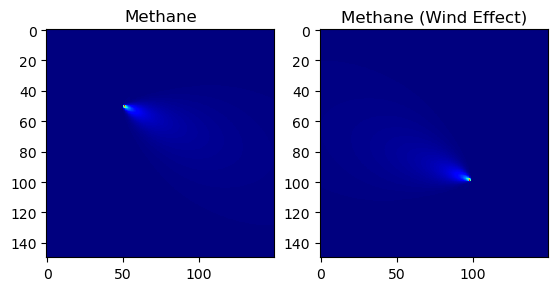

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate


filename = "/Users/yunhalee/Documents/methanDart/Gaussian_Puff_CH4/output_data/gplume_conc/gplume_output_WS_1.5_stackH_30_stability_['B']_radiaton_weak_WD_20_spread_20.npy"
methane_data = np.load(filename)


def apply_wind_effect(methane_data, wind_direction):
    """
    Apply the wind direction effect to the methane image data.
    
    Parameters: 
    methane_data: 2D array of methane transmittance data
    wind_direction: Wind direction in degrees (0-360)

    Return: Rotated methane data to simulate wind direction change
    """
    # Rotate the methane data based on wind direction
    rotated_methane = rotate(methane_data, angle=-wind_direction, reshape=False, mode='nearest')
    return rotated_methane

# Simulate for a specific wind direction (e.g., 45 degrees)
wind_direction = 180
methane_with_wind = apply_wind_effect(methane_data, wind_direction)


# Display the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.title("Methane")
plt.imshow(np.mean(methane_data, axis = -1).T, cmap='jet')

plt.subplot(1, 3, 2)
plt.title("Methane (Wind Effect)")
plt.imshow(np.mean(methane_with_wind, axis = -1).T, cmap='jet')


plt.show()

# read carbonmapper plume image to get the concentration range

Carbon mapper's concentration is ppm per meter. 


<Figure size 1000x1000 with 0 Axes>

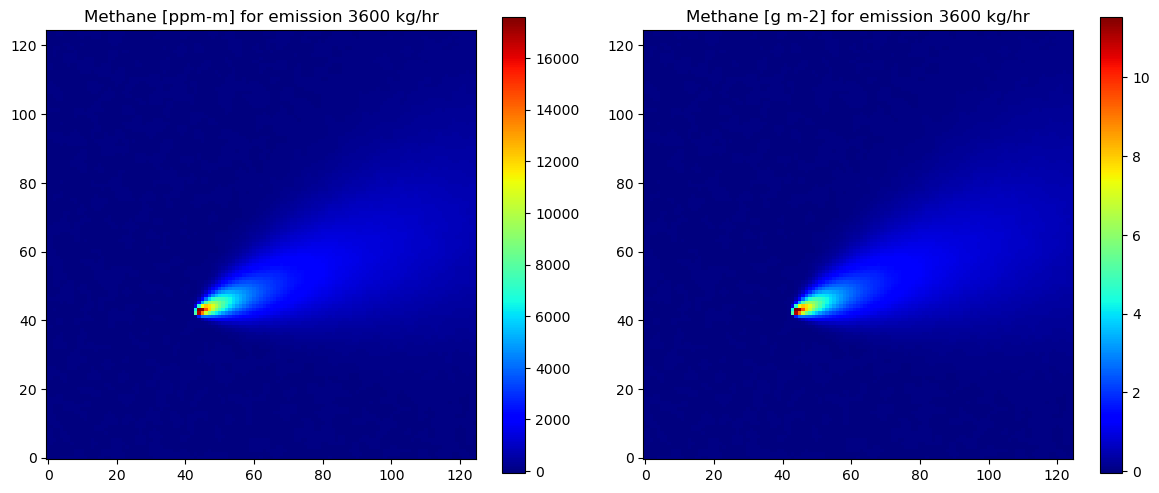

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate


filename = "/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/output_data/gplume_conc/gplume_output_WS_6.5_stackH_30_stability_['D']_radiaton_weak_WD_20_spread_40.npy"
filename = "/Users/yunhalee/Documents/methanDart/Gaussian_CH4_Modeling/output_data/gplume_conc/gplume_output_WS_1.5_stackH_30_stability_['A']_radiaton_strong_WD_20_spread_10.npy"
methane_data = np.load(filename)

# Convert ug m-3 to ppm per meter
mean_ch4_concentration = np.mean(methane_data, axis=2)

# Constants
R = 8.314  # Ideal gas constant in J/(mol·K)
T = 298.15  # Standard temperature in K
P = 101325  # Standard pressure in Pa
M = 16.04  # Molar mass of CH4 in g/mol

total_grid_height = 2000 # meters 
ch4_ppm = (mean_ch4_concentration / 1e6) * R * T / (M * P) * 1e6
ch4_ppm = ch4_ppm * total_grid_height 

# convert ug m-3 to g m-2
ch4_column_burden = np.sum(methane_data/1e6 * 20, axis=2)


# Display the results
plt.figure(figsize=(10, 10))

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First subplot
im1 = axs[0].imshow(ch4_ppm.T, cmap='jet', origin='lower')
axs[0].set_title("Methane [ppm-m] for emission 3600 kg/hr")
cbar1 = fig.colorbar(im1, ax=axs[0], shrink=0.8)  # Use shrink to reduce the size of the color bar

# Second subplot
im2 = axs[1].imshow(ch4_column_burden.T, cmap='jet', origin='lower')
axs[1].set_title("Methane [g m-2] for emission 3600 kg/hr")
cbar2 = fig.colorbar(im2, ax=axs[1], shrink=0.8)  # Use shrink to reduce the size of the color bar

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

DataArray info:
<xarray.DataArray (band: 4, y: 101, x: 102)> Size: 41kB
[41208 values with dtype=uint8]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 816B 2.401e+05 2.401e+05 ... 2.456e+05 2.456e+05
  * y            (y) float64 808B 3.496e+06 3.496e+06 ... 3.491e+06 3.491e+06
    spatial_ref  int64 8B 0
Attributes:
    creation_time:  2024-08-13T18:00:13Z
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('Red', 'Green', 'Blue', 'Alpha')
('band', 'y', 'x')
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 816B 2.401e+05 2.401e+05 ... 2.456e+05 2.456e+05
  * y            (y) float64 808B 3.496e+06 3.496e+06 ... 3.491e+06 3.491e+06
    spatial_ref  int64 8B 0
{'creation_time': '2024-08-13T18:00:13Z', 'AREA_OR_POINT': 'Area', 'scale_factor': 1.0, 'add_offset': 0.0, 'long_name': ('Red', 'Green', 'Blue', 'Alpha')}
CRS: EPSG:32614
Bounds: (240050.32991583587, 3490869.740252937, 

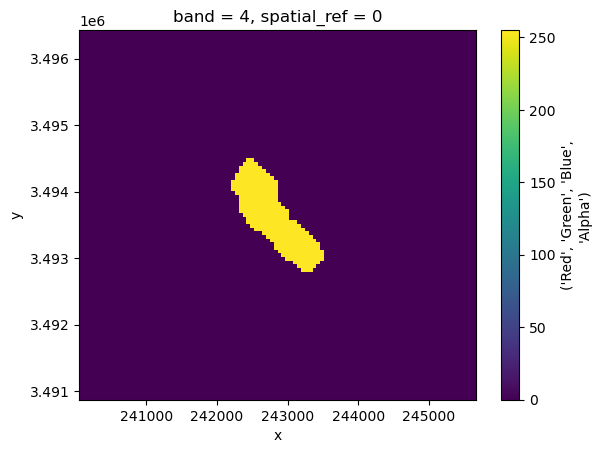

In [12]:
import xarray as xr
import rioxarray

# Path to the GeoTIFF file
file = "/Users/yunhalee/Documents/methanDart/carbonmapper/CarbonMapper_Aerial/carbonmapper_ch4_rgb_geotiffs_2020_2021/carbonmapper_ch4_rgb_geotiffs_2020_2021/ang20200708t192518-3_r1823_c108_ctr.tif"

file = "/Users/yunhalee/Documents/methanDart/carbonmapper/download/emi20240727t195505p13015-A_l3a-vis-ch4-mfa-v002_plume.tif"
# Open the GeoTIFF file as an xarray DataArray
data = rioxarray.open_rasterio(file)

# Display basic information about the data
print("DataArray info:")
print(data)

# Plotting the first band (or all bands if it's a multi-band image)
data.plot()

print(data.dims) 
print(data.coords)  
print(data.attrs) 

band1 = data.sel(band=4) 
band1.plot()  # Plot the first band

print("CRS:", data.rio.crs) 
print("Bounds:", data.rio.bounds()) 

## TODO - find out the unit of the data